In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Load Data
df_pnbk = pd.read_csv("/content/PNBK Historical Data.csv")

In [ ]:
print(df_pnbk.columns.tolist())


['Close', 'Open', 'High', 'Low', 'Volume', 'Change %']


In [ ]:
df_pnbk = pd.read_csv('/content/PNBK Historical Data.csv', encoding='utf-8-sig')
print(df_pnbk.columns)


Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


In [ ]:
# Convert date and sort
df_pnbk['Date'] = pd.to_datetime(df_pnbk['Date'], dayfirst=True)
df_pnbk = df_pnbk.sort_values('Date')
df_pnbk.set_index('Date', inplace=True)

# Clean 'Vol.' (remove M for millions, K for thousands)
def parse_volume(val):
    val = val.replace('M', 'e6').replace('K', 'e3')
    return float(eval(val))

df_pnbk['Vol.'] = df_pnbk['Vol.'].apply(parse_volume)

# Clean 'Change %'
df_pnbk['Change %'] = df_pnbk['Change %'].str.replace('%', '').astype(float)

# Rename 'Price' to 'Close'
df_pnbk.rename(columns={'Price': 'Close', 'Vol.': 'Volume'}, inplace=True)

# Convert other columns to float
cols = ['Close', 'Open', 'High', 'Low']
df_pnbk[cols] = df_pnbk[cols].astype(float)

df_pnbk.head()


,Close,Open,High,Low,Volume,Change %
Date,,,,,,
2025-01-01,102.66,102.35,103.30,101.77,10560000.0,-0.12
2025-01-02,105.48,102.66,105.92,101.45,30430000.0,2.75
2025-01-03,106.40,105.45,107.25,105.22,34670000.0,0.87
2025-01-06,101.74,106.37,106.37,101.28,44290000.0,-4.38
2025-01-07,103.11,102.00,104.59,102.00,21100000.0,1.35


In [ ]:
# 2. Summary Statistics
print("Summary Statistics:\n")
print(df.describe())

Summary Statistics:

            Price        Open        High         Low
count   62.000000   62.000000   62.000000   62.000000
mean    95.682258   95.932742   97.152258   94.342097
std      4.951530    5.079753    5.017051    4.918033
min     86.900000   86.500000   87.850000   85.460000
25%     92.032500   91.802500   93.452500   90.932500
50%     95.800000   96.455000   97.590000   94.655000
75%     99.410000  100.080000  100.775000   98.092500
max    106.400000  106.370000  107.250000  105.220000


In [ ]:
# 3. Missing Values
print("\nMissing Values:\n")
print(df.isnull().sum())



Missing Values:

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [ ]:
# Clean column names
df.columns = df.columns.str.strip()  # removes leading/trailing whitespace

# Optional: Print to verify
print(df.columns.tolist())

['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']


In [ ]:
# Clean columns: strip spaces and weird characters
df.columns = df.columns.str.encode('ascii', 'ignore').str.decode('utf-8')  # removes non-ASCII
df.columns = df.columns.str.strip().str.replace(r"\s+", " ", regex=True)  # strip and reduce spaces

print("Cleaned Columns:", df.columns.tolist())


Cleaned Columns: ['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']


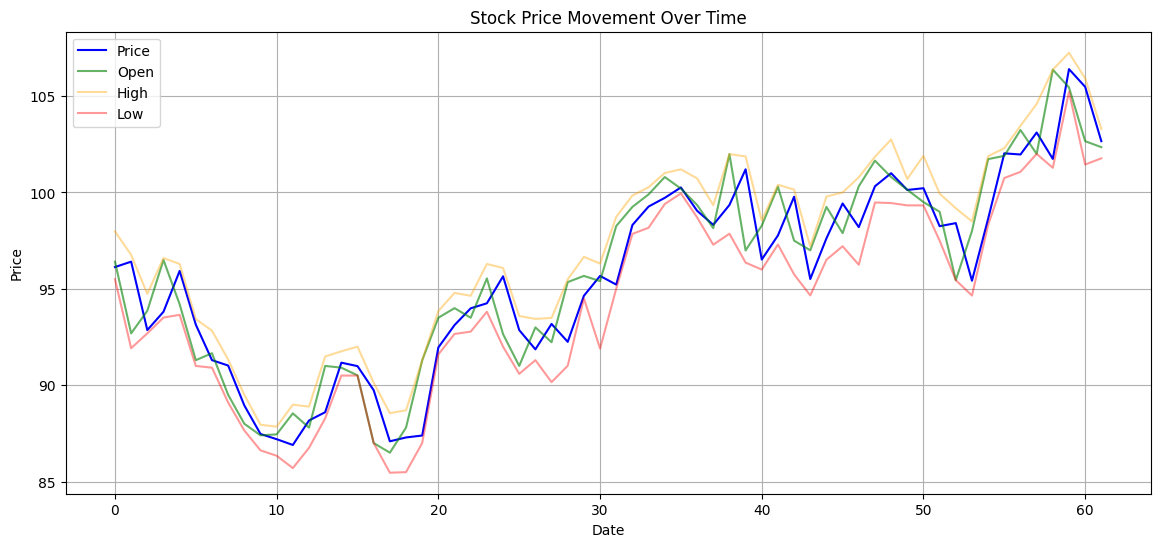

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df['Price'], label='Price', color='blue')  # Replaced 'Close' with 'Price'
plt.plot(df['Open'], label='Open', color='green', alpha=0.6)
plt.plot(df['High'], label='High', color='orange', alpha=0.4)
plt.plot(df['Low'], label='Low', color='red', alpha=0.4)
plt.title("Stock Price Movement Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


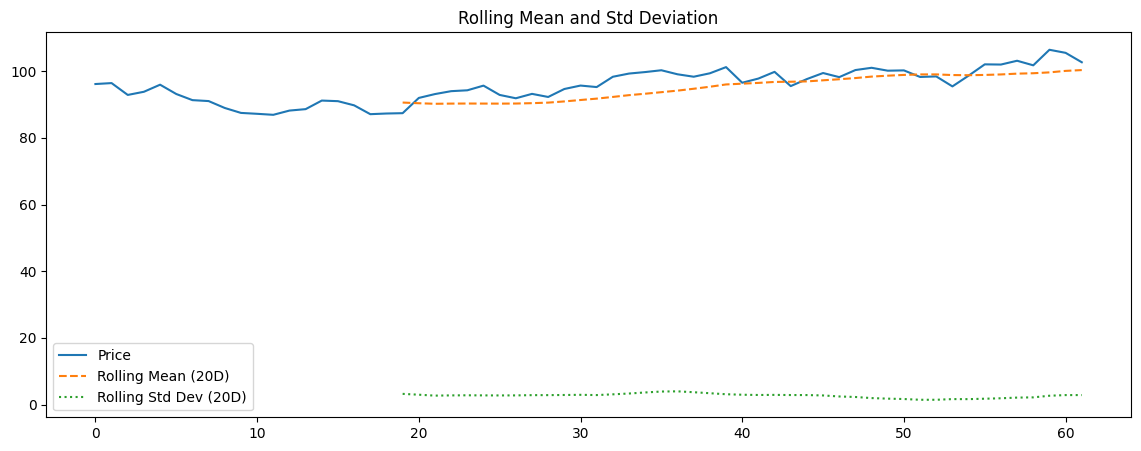

In [ ]:
rolling_mean = df['Price'].rolling(window=20).mean()
rolling_std = df['Price'].rolling(window=20).std()

plt.figure(figsize=(14, 5))
plt.plot(df['Price'], label='Price')
plt.plot(rolling_mean, label='Rolling Mean (20D)', linestyle='--')
plt.plot(rolling_std, label='Rolling Std Dev (20D)', linestyle=':')
plt.title("Rolling Mean and Std Deviation")
plt.legend()
plt.show()

In [ ]:
df.rename(columns={'Price': 'Close'}, inplace=True)


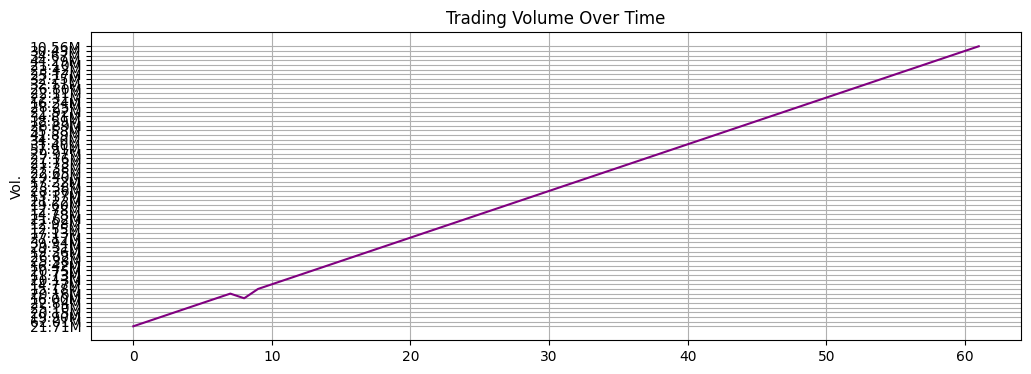

In [ ]:
# 7. Volume Over Time
plt.figure(figsize=(12, 4))
plt.plot(df['Vol.'], color='purple')
plt.title("Trading Volume Over Time")
plt.ylabel("Vol.")
plt.grid(True)
plt.show()

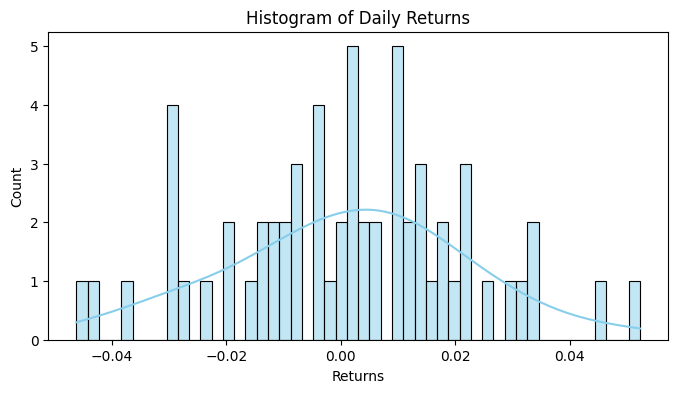

In [ ]:
# 8. Daily Returns Histogram
df['Returns'] = df['Close'].pct_change()
plt.figure(figsize=(8, 4))
sns.histplot(df['Returns'].dropna(), bins=50, kde=True, color='skyblue')
plt.title("Histogram of Daily Returns")
plt.xlabel("Returns")
plt.show()

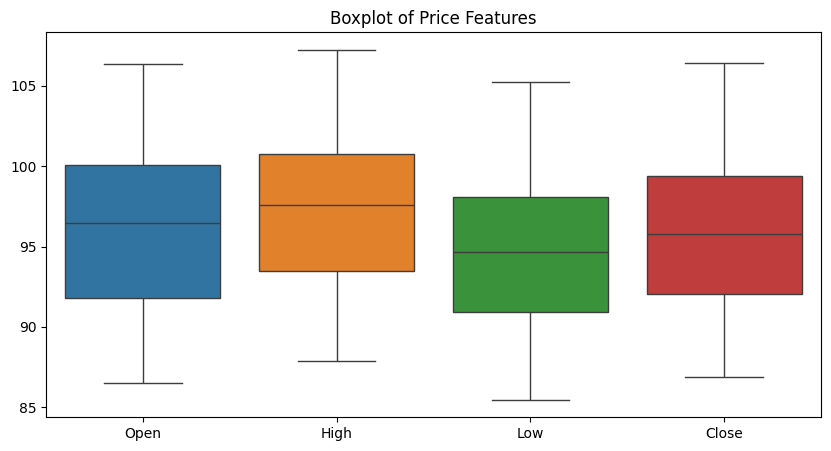

In [ ]:
# 9. Boxplot for Outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title("Boxplot of Price Features")
plt.show()


NameError: name 'go' is not defined

In [ ]:
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df['Close'] = df['Close'].clip(lower, upper)

In [ ]:
# 4. Stationarity Check
adf_result = adfuller(df['Close'].dropna())
print("ADF Test:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Stationary" if adf_result[1] < 0.05 else "Not Stationary")

ADF Test:
ADF Statistic: -1.2691596916403833
p-value: 0.6431610725329027
Not Stationary


In [ ]:
# 5. Differencing if not stationary
if adf_result[1] >= 0.05:
    df['Close_diff'] = df['Close'].diff().dropna()
else:
    df['Close_diff'] = df['Close']

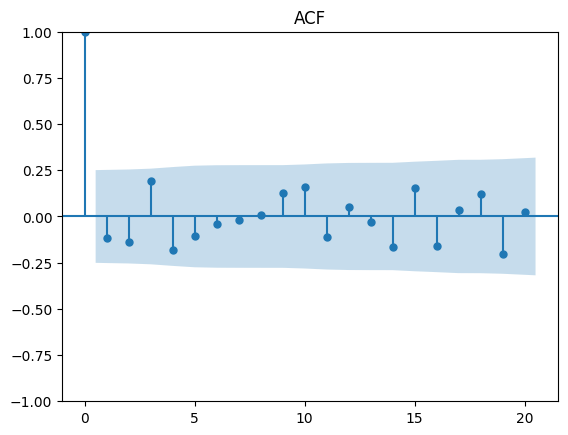

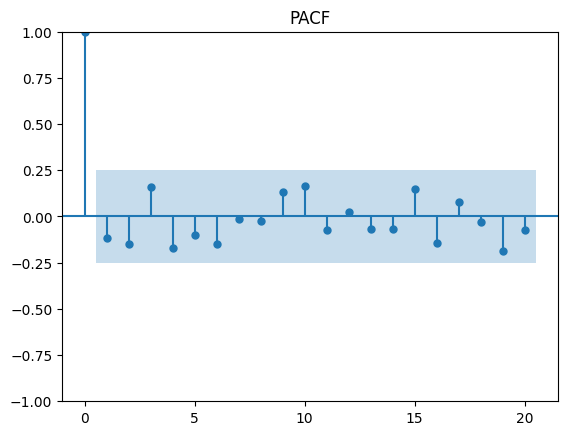

In [ ]:
# 6. ACF and PACF
plot_acf(df['Close_diff'].dropna(), lags=20)
plt.title("ACF")
plt.show()

plot_pacf(df['Close_diff'].dropna(), lags=20)
plt.title("PACF")
plt.show()

In [ ]:

# 7. Train-Test Split
train = df['Close'][:-5]
test = df['Close'][-5:]

In [ ]:
# 8. ARIMA Model
model = ARIMA(train, order=(1, 1, 1))  # You can optimize this
fitted_model = model.fit()
forecast = fitted_model.forecast(steps=len(test))

print("Forecast vs Actual:")
print(pd.DataFrame({'Forecast': forecast, 'Actual': test}))


Forecast vs Actual:
      Forecast  Actual
57  102.120941  103.11
58  102.007531  101.74
59  102.092742  106.40
60  102.028719  105.48
61  102.076822  102.66


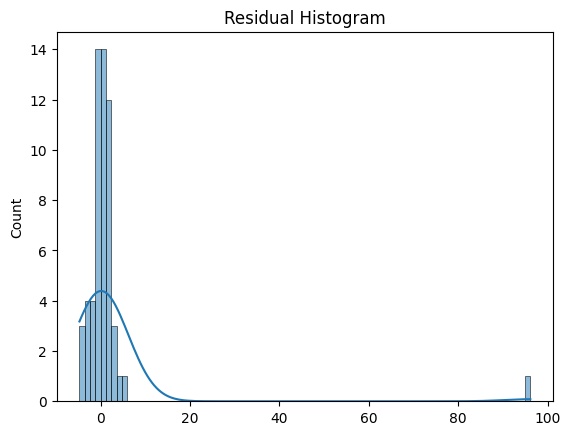

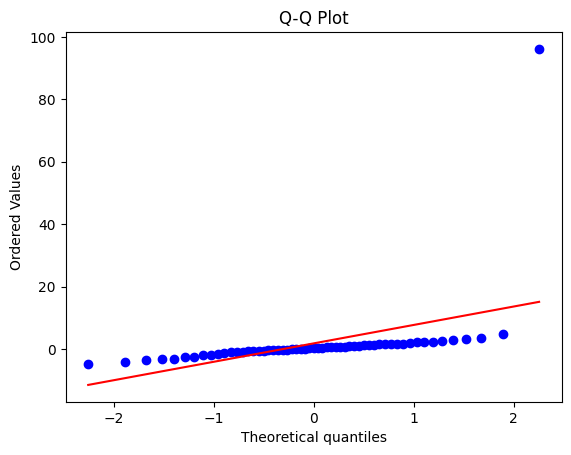

In [ ]:
# 9. Residual Analysis
residuals = fitted_model.resid
sns.histplot(residuals, kde=True)
plt.title("Residual Histogram")
plt.show()

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

In [ ]:
# 10. Performance Metrics: Returns, Volatility, Max Drawdown
returns = df['Close'].pct_change().dropna()
cumulative_returns = (1 + returns).cumprod()
running_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - running_max) / running_max
max_drawdown = drawdown.min()


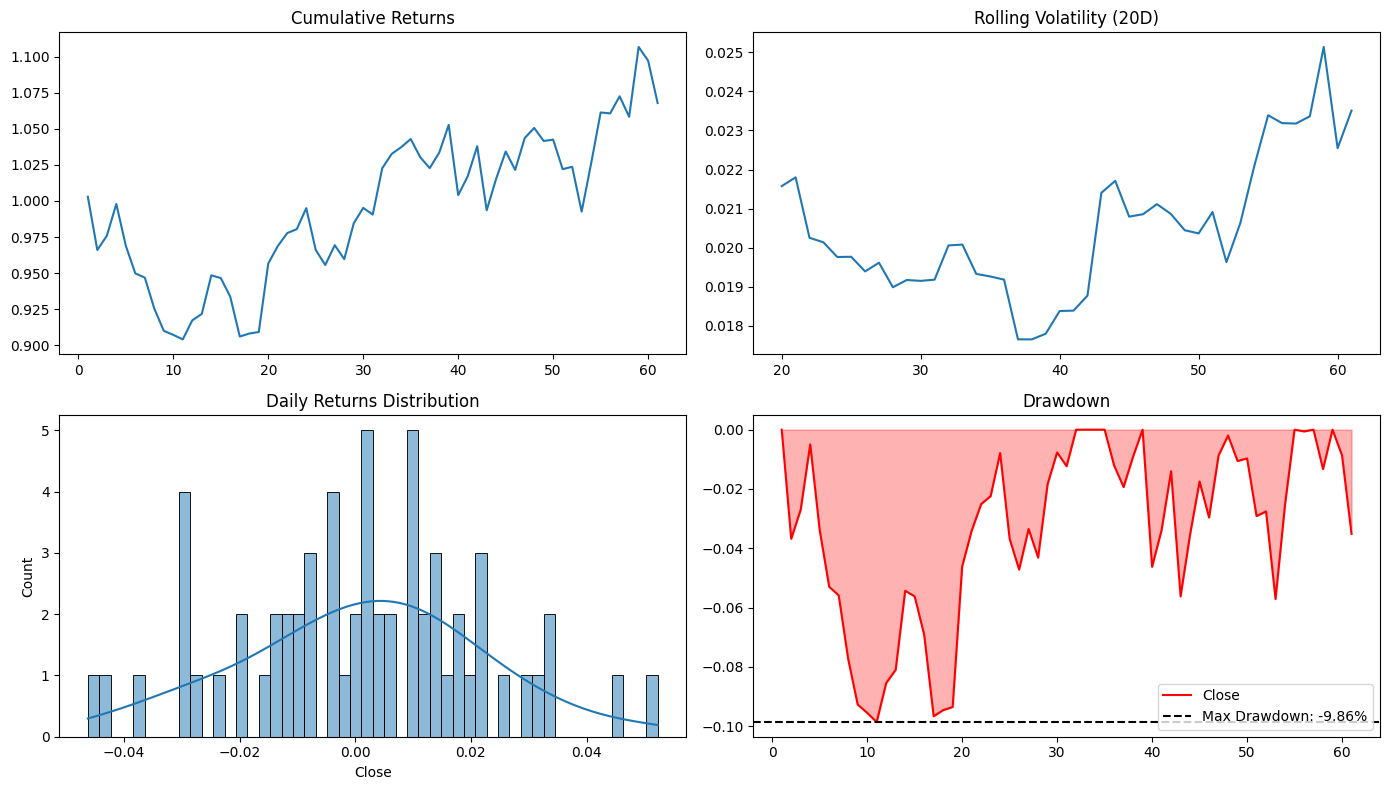

In [ ]:
# Plotting
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
cumulative_returns.plot(title="Cumulative Returns")

plt.subplot(2, 2, 2)
returns.rolling(window=20).std().plot(title="Rolling Volatility (20D)")

plt.subplot(2, 2, 3)
sns.histplot(returns, bins=50, kde=True)
plt.title("Daily Returns Distribution")

plt.subplot(2, 2, 4)
drawdown.plot(color='red')
plt.fill_between(drawdown.index, drawdown, 0, color='red', alpha=0.3)
plt.axhline(y=max_drawdown, color='black', linestyle='--', label=f'Max Drawdown: {max_drawdown:.2%}')
plt.title("Drawdown")
plt.legend()

plt.tight_layout()
plt.show()